# Last notebook does EDA on the final 63342 data pts, whole Australia, 10 yrs, balanced. This notebook drops 2010 and 2011 data and does same process

In [2]:
import warnings
warnings.filterwarnings('ignore')
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Data science
import pandas as pd
import numpy as np

In [12]:
# Read in data, drop useless columns, check null values
df = pd.read_csv('climate_frog1020.csv').drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country', 'continent'],axis = 1)
print(df.shape)
df.isnull().sum()

# To make EDA easier, create new column of year & new column of month, type int
year = []
month = []
for i in df['eventDate']:
    year.append(int(str(i).split('-')[0]))
    month.append(int(str(i).split('-')[1]))
df['year'] = year
df['month'] = month
# Drop 2 years
df = df[df['year'] >2011]
df = df.sort_values(by = 'eventDate')
print(df.shape)

(63342, 20)
(55955, 22)


In [4]:
# Check that they are the same 602 pts, 356CS, 246LF, so roughly balanced between species. Drop these rows**
df[df['ws_mean'].isnull()].groupby('year').count()

,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,species,coordinateUncertaintyInMeters,occurrenceStatus,key,aet_mean,...,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,month
year,,,,,,,,,,,,,,,,,,,,,
2012,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2013,17,17,17,17,17,17,17,17,17,0,...,0,0,0,0,0,0,0,0,0,17
2014,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2015,2,2,2,2,2,2,2,2,2,0,...,0,0,0,0,0,0,0,0,0,2
2016,3,3,3,3,3,3,3,3,3,0,...,0,0,0,0,0,0,0,0,0,3
2017,40,40,40,40,40,40,40,40,40,0,...,0,0,0,0,0,0,0,0,0,40
2018,113,113,113,113,113,113,113,113,113,0,...,0,0,0,0,0,0,0,0,0,113
2019,182,182,182,182,182,182,182,182,182,0,...,0,0,0,0,0,0,0,0,0,182
2020,233,233,233,233,233,233,233,233,233,0,...,0,0,0,0,0,0,0,0,0,233


In [13]:
df = df.dropna()

In [14]:
# Rebalance species

# drop the old keys
df = df.drop('key',axis = 1)

target_species_frog_data = df[df.occurrenceStatus == 1]
frog_data = (
    df[lambda x: x.occurrenceStatus == 0]
    .sample(len(target_species_frog_data), random_state=420, replace=True)
    .append(target_species_frog_data)
    # assign key for joining purposes
    .reset_index(drop=True)
    .assign(key=lambda x: x.index)
)

# Assign the balanced frog_data back to df
df = frog_data

### Now we have our data ready. Take a look at the 11 climate variables first
### 1. Analysis with no time scale (i.e., all 10 years)

In [19]:
# First get the 11 vars into a new df
columns = ['aet_mean', 'def_mean', 'pet_mean','ppt_mean', 'q_mean', 'srad_mean', 'tmax_mean', 'tmin_mean', 'vap_mean','vpd_mean', 'ws_mean']
df2 = pd.DataFrame()
for i in columns:
    df2[i] = df[i]
df2.describe()

,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
count,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000
mean,60.460872,54.887971,115.316446,68.734841,8.697863,205.166216,22.833361,11.889984,1.355548,0.767675,3.819192
std,17.930535,19.009832,10.387051,30.675426,21.522102,12.767878,2.497559,2.805388,0.265267,0.139820,0.795696
min,12.083333,3.916667,64.583333,12.666667,0.500000,153.416667,9.116668,0.841667,0.615000,0.274167,2.258333
25%,46.083333,42.083333,109.833333,51.166667,2.833333,195.166667,21.313891,10.102085,1.140000,0.685000,3.233333
50%,62.000000,51.583333,114.833333,65.750000,3.416667,207.833333,22.991669,12.741668,1.379167,0.744167,3.716667
75%,72.666667,66.750000,121.666667,79.222222,6.000000,213.416667,24.308334,13.391668,1.485833,0.835833,4.250000
max,125.583333,139.750000,159.666667,401.083333,318.250000,243.000000,31.591668,21.350002,2.400000,1.848333,9.716667


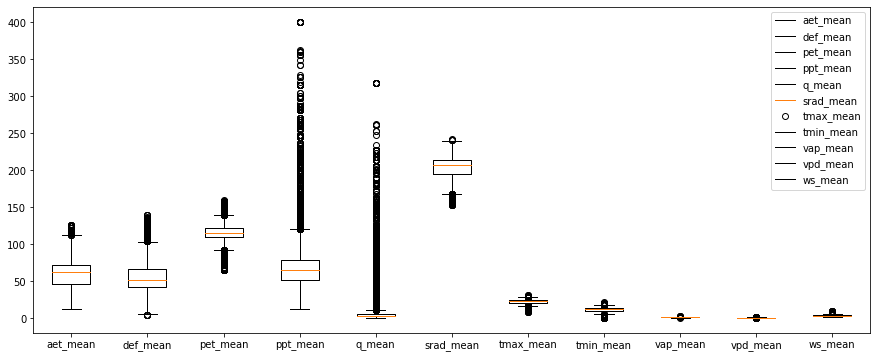

In [20]:
# draw box plot
fig, ax = plt.subplots(figsize=(15,6))
ax.boxplot(df2)
ax.set_xticklabels(columns)
plt.legend(columns)

**We can see from the  BOXPLOT  that ppt_mean and q_mean are *super skewed*.  Which year caused this?**

**What do they stand for again? ppt_mean is Accumulated Precipitation, and q_mean is runoff.**

In [21]:
df2.describe()[['ppt_mean','q_mean']]

,ppt_mean,q_mean
count,49822.000000,49822.000000
mean,68.734841,8.697863
std,30.675426,21.522102
min,12.666667,0.500000
25%,51.166667,2.833333
50%,65.750000,3.416667
75%,79.222222,6.000000
max,401.083333,318.250000


In [22]:
# Which years have ppt_mean / q_mean above its 75% percentile? 
print('ppt_mean large outliers: ')
print(df[df['ppt_mean']>=80.75]['year'].value_counts())
print('q_mean large outliers: ')
print(df[df['q_mean']>=5.444444]['year'].value_counts())

ppt_mean large outliers: 
2018    3633
2020    2294
2017    1291
2019    1263
2015     914
2016     859
2014     468
2013     466
2012     231
Name: year, dtype: int64
q_mean large outliers: 
2020    4919
2019    2499
2018    1413
2017    1107
2015     962
2016     923
2013     519
2014     424
2012     282
Name: year, dtype: int64


### ❓One step further: what CAUSED this skewness?
### In EDA_1, 2010 ranked #1, and #2 on contributing to outliers in these two vars. 2011 ranked #4 and #4. After dropping them, skewness INCREASED, and the later years are contributing more to the skewness. 

### 2. Analysis over time, by year and by month, for each variable
#### Let's first do by year

In [24]:
df

,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,species,coordinateUncertaintyInMeters,occurrenceStatus,aet_mean,def_mean,...,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month,key
0,3108924679,2019-05-21 00:00:00,New South Wales,-30.327163,150.335514,Crinia Signifera,5.00,0,21.166667,116.500000,...,1.083333,226.416667,22.666668,8.283334,0.850000,1.210833,3.416667,2019,5,0
1,3463498146,2020-11-06 00:00:00,Tasmania,-41.675200,146.910000,Crinia Signifera,4.01,0,42.750000,52.750000,...,8.583333,182.333333,17.258336,6.291668,0.936667,0.588333,4.975000,2020,11,1
2,3463520517,2020-07-02 00:00:00,Australian Capital Territory,-35.192800,149.110000,Crinia Signifera,42.18,0,31.666667,76.333333,...,1.583333,214.083333,20.016667,6.916668,1.026667,0.776667,3.266667,2020,7,2
3,3463505912,2020-07-07 00:00:00,New South Wales,-33.755164,150.615759,Crinia Signifera,5.00,0,43.583333,71.750000,...,2.500000,213.416667,24.075002,11.325001,1.288333,0.977500,2.558333,2020,7,3
4,3463684781,2020-11-03 00:00:00,Australian Capital Territory,-35.508773,148.929449,Crinia Signifera,6.00,0,40.083333,47.000000,...,7.083333,207.250000,14.725001,3.091667,0.836667,0.482500,4.066667,2020,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,3013976233,2020-12-27 19:45:00,New South Wales,-33.764413,151.146500,Litoria Fallax,2.00,1,66.666667,44.833333,...,3.750000,208.416667,22.716668,12.508334,1.405000,0.772500,3.375000,2020,12,49817
49818,3014012233,2020-12-27 19:49:00,New South Wales,-33.764314,151.146919,Litoria Fallax,5.00,1,66.666667,44.833333,...,3.750000,208.416667,22.716668,12.508334,1.405000,0.772500,3.375000,2020,12,49818
49819,3013893209,2020-12-30 20:39:00,New South Wales,-32.520437,152.322849,Litoria Fallax,61.00,1,56.500000,56.750000,...,3.000000,214.083333,23.475002,13.783335,1.597500,0.702500,4.116667,2020,12,49819
49820,3018139068,2020-12-30 21:44:26,Victoria,-37.743051,145.308276,Litoria Fallax,44.00,1,55.833333,50.750000,...,11.083333,184.666667,19.975002,9.650002,1.105833,0.731667,4.733333,2020,12,49820


<function matplotlib.pyplot.show(close=None, block=None)>

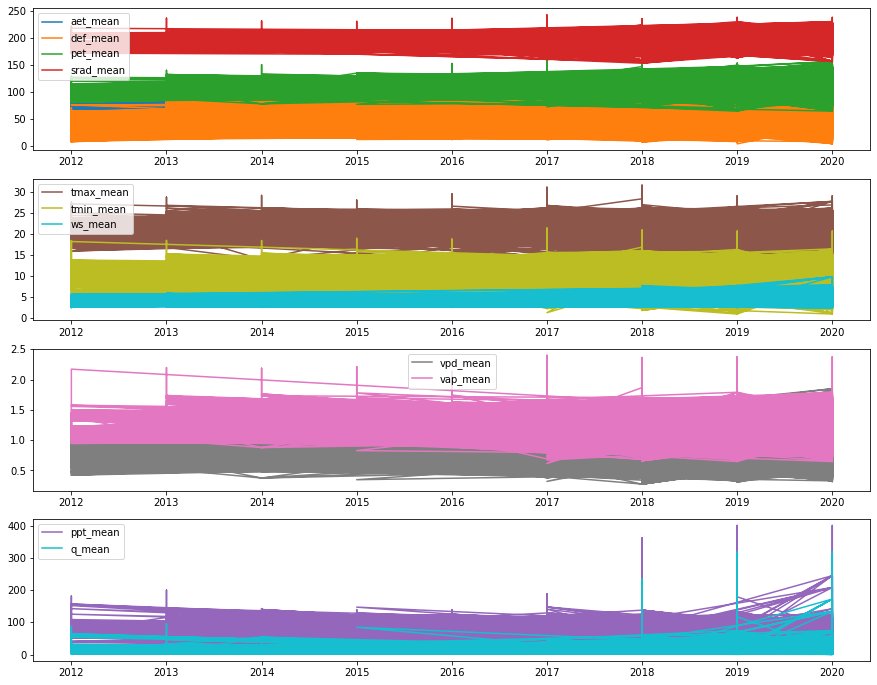

In [25]:
# Group the 11 vars into 4 groups, depending on their values & whether they are outliers
large = ['aet_mean','def_mean','pet_mean','srad_mean']
small = ['tmax_mean','tmin_mean','ws_mean']
supersmall = ['vpd_mean','vap_mean']
outliers = ['ppt_mean','q_mean']

# This title is not showing for some reason
fig.suptitle('trend of 11 vars over 8 years',fontsize = 12)

fig, ax = plt.subplots(ncols = 1, nrows = 4, figsize=(15,12))
colors1 = ['tab:blue','tab:orange','tab:green','tab:red']
colors2 = ['tab:brown','tab:olive','tab:cyan',]
colors3 = ['tab:grey','tab:pink']
colors4 = ['tab:purple','tab:cyan']

for i in range(4):
    plot1 = ax[0].plot(df['year'],df[large[i]], color=colors1[i])
ax[0].legend(large)

for i in range(3):
    plot2 = ax[1].plot(df['year'],df[small[i]], color=colors2[i])
ax[1].legend(small)

for i in range(2):
    plot3 = ax[2].plot(df['year'],df[supersmall[i]], color=colors3[i])
ax[2].legend(supersmall)

for i in range(2):
    plot4 = ax[3].plot(df['year'],df[outliers[i]], color=colors4[i])
ax[3].legend(outliers)
plt.show

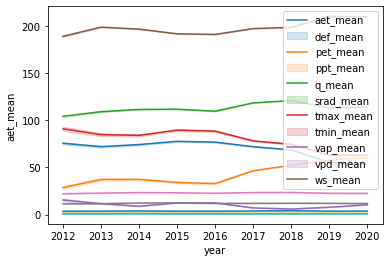

In [26]:
# Here's a more readable lineplot
plt.figsize = (8,14)
fig.suptitle('trend of 11 vars over 10 years')
for column in columns:
    plt1= sns.lineplot(x = df['year'], y = df[column])
plt.legend(columns)

**From the PSEUDOLINEPLOT, we can see that after grouping,**

**srad, tmax, tmin, and vap (and maybe slightly ppt) seem to be changing together;**

**aet seem to be going opposite with def**

### ❓What else?


#### Now let's see by month

In [28]:
df.groupby('month').count()

,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,species,coordinateUncertaintyInMeters,occurrenceStatus,aet_mean,def_mean,...,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,key
month,,,,,,,,,,,,,,,,,,,,,
1,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996,...,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996
2,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409,...,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409
3,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,...,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
4,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,...,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433
5,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,...,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479
6,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,...,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153
7,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788,...,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788
8,3762,3762,3762,3762,3762,3762,3762,3762,3762,3762,...,3762,3762,3762,3762,3762,3762,3762,3762,3762,3762
9,7300,7300,7300,7300,7300,7300,7300,7300,7300,7300,...,7300,7300,7300,7300,7300,7300,7300,7300,7300,7300


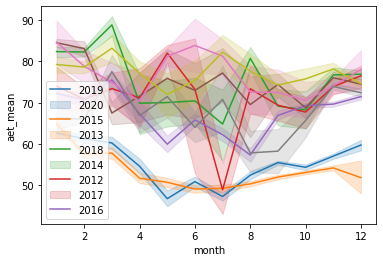

In [29]:
for year in df['year'].unique():
    sns.lineplot(x = df[df['year']==year]['month'], y = df['aet_mean'])
plt.legend(df['year'].unique())

### 3. Okay, now we see the trend&distribution of the climate vars. But do they correlate with occurrence? 
### We'll use two ways to see correlation: pearson, which tests if a linear decision boundary exists, and scatterplots, which will test if polynomial/ curvery boundary exist

In [30]:
# Get a new df to use
df3 = df.drop(['key','gbifID', 'eventDate', 'species', 'coordinateUncertaintyInMeters'],axis = 1)
df3.columns

Index(['stateProvince', 'decimalLatitude', 'decimalLongitude',
       'occurrenceStatus', 'aet_mean', 'def_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'srad_mean', 'tmax_mean', 'tmin_mean', 'vap_mean', 'vpd_mean',
       'ws_mean', 'year', 'month'],
      dtype='object')

In [35]:
df3[df3['occurrenceStatus']==1].describe()

,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month
count,24911.000000,24911.000000,24911.0,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000,24911.000000
mean,-30.848840,151.456051,1.0,67.271609,52.144846,119.384673,77.337430,11.058952,209.242619,24.249323,13.484230,1.505357,0.792376,3.674963,2018.451287,8.191442
std,4.284250,1.680582,0.0,16.364035,17.114197,8.967719,36.573117,29.246702,11.681282,1.732487,2.054548,0.225889,0.116683,0.609869,1.702581,3.873947
min,-38.159100,144.655000,1.0,12.083333,6.722222,89.694444,12.666667,0.666667,173.500000,18.354168,6.537501,0.920000,0.468333,2.258333,2012.000000,1.000000
25%,-33.725500,151.058618,1.0,58.500000,40.916667,112.083333,60.666667,3.083333,198.833333,22.966668,12.750002,1.373333,0.723333,3.233333,2018.000000,4.000000
50%,-32.934963,151.365000,1.0,66.666667,47.833333,118.500000,69.666667,3.500000,210.333333,24.041669,13.050002,1.463333,0.756667,3.658333,2019.000000,10.000000
75%,-28.273550,152.799000,1.0,77.750000,62.500000,125.250000,83.500000,5.083333,219.333333,25.408335,14.216669,1.606667,0.858333,4.025000,2020.000000,11.000000
max,-16.250838,153.624262,1.0,125.583333,136.083333,159.666667,401.083333,318.250000,243.000000,31.591668,21.350002,2.400000,1.840417,6.250000,2020.000000,12.000000


In [34]:
df3.describe()

,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month
count,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000,49822.000000
mean,-32.863429,150.040604,0.500000,60.460872,54.887971,115.316446,68.734841,8.697863,205.166216,22.833361,11.889984,1.355548,0.767675,3.819192,2018.629581,8.032977
std,4.036492,3.120843,0.500005,17.930535,19.009832,10.387051,30.675426,21.522102,12.767878,2.497559,2.805388,0.265267,0.139820,0.795696,1.657048,3.351098
min,-43.473672,135.783000,0.000000,12.083333,3.916667,64.583333,12.666667,0.500000,153.416667,9.116668,0.841667,0.615000,0.274167,2.258333,2012.000000,1.000000
25%,-34.851924,149.701895,0.000000,46.083333,42.083333,109.833333,51.166667,2.833333,195.166667,21.313891,10.102085,1.140000,0.685000,3.233333,2018.000000,6.000000
50%,-33.643021,151.067598,0.500000,62.000000,51.583333,114.833333,65.750000,3.416667,207.833333,22.991669,12.741668,1.379167,0.744167,3.716667,2019.000000,9.000000
75%,-32.216196,151.596220,1.000000,72.666667,66.750000,121.666667,79.222222,6.000000,213.416667,24.308334,13.391668,1.485833,0.835833,4.250000,2020.000000,11.000000
max,-16.250838,153.630000,1.000000,125.583333,139.750000,159.666667,401.083333,318.250000,243.000000,31.591668,21.350002,2.400000,1.848333,9.716667,2020.000000,12.000000


In [55]:
df3.corr('pearson')['occurrenceStatus']

decimalLatitude     0.499099
decimalLongitude    0.453551
occurrenceStatus    1.000000
aet_mean            0.379844
def_mean           -0.144302
pet_mean            0.391667
ppt_mean            0.280442
q_mean              0.109706
srad_mean           0.319273
tmax_mean           0.566944
tmin_mean           0.568286
vap_mean            0.564754
vpd_mean            0.176667
ws_mean            -0.181264
year               -0.107599
month               0.047288
Name: occurrenceStatus, dtype: float64

**We can see from above: after dropping 2 yrs,**

- corr(year) decreases, which is good; corr(decimalLatitude) increases, also good, and is greater than the decrement in corr(decimalLongitude)
- among the 11 vars, 5 decreased and 6 increased. (Of the two furthest outliers, ppt decreased, q increased)

<AxesSubplot:xlabel='tmin_mean', ylabel='decimalLatitude'>

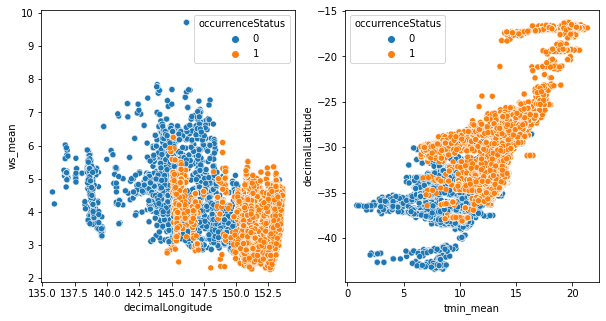

In [56]:
# Scatterplot to see correlations
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(10,5))
sns.scatterplot(ax = ax[0], data = df3, y= 'ws_mean', x = 'decimalLongitude', hue = 'occurrenceStatus')
sns.scatterplot(ax = ax[1], data = df3, x = 'tmin_mean', y = 'decimalLatitude', hue = 'occurrenceStatus')

**From above, can see that:**
- the decision boundary is probably nonliner except for tmax and tmin. 

**Now let's normalize everything, then see if pearson changes**